In [1]:
import pandas as pd
import numpy as np
#import copy

import specifics
import data

#import xgboost
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
import scipy.stats as st # For parameter generation

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
train_feature_dataset = pd.DataFrame.from_csv('dataset/traindata.csv')
train_outcome_dataset = pd.DataFrame.from_csv('dataset/status_group.csv')
test_feature_dataset = pd.DataFrame.from_csv('dataset/testdata.csv')

In [4]:
train_feature_dataset.shape

(59400, 39)

In [5]:
train_feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [6]:
train_feature_dataset.head(5).iloc[:,0:20]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management
id,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN


In [7]:
train_feature_dataset.head(5).iloc[:,20:40]

,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,
69572,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
data = specifics.build_data(train_feature_df = train_feature_dataset, 
                            train_outcome_df = train_outcome_dataset, 
                            test_feature_df = test_feature_dataset)

In [9]:
data.train_feature_df.shape

(59400, 267)

In [10]:
data.test_feature_df.shape

(14850, 267)

In [11]:
#pd.set_option('display.max_rows', 3000)
list(data.train_feature_df.columns.values)[0:3000]

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'public_meeting',
 'permit',
 'construction_year',
 'created_day',
 'created_dow',
 'created_month',
 'created_year',
 'age',
 'basin__internal',
 'basin__lake_nyasa',
 'basin__lake_rukwa',
 'basin__lake_tanganyika',
 'basin__lake_victoria',
 'basin__pangani',
 'basin__rufiji',
 'basin__ruvuma_/_southern_coast',
 'basin__wami_/_ruvu',
 'region__arusha',
 'region__dar_es_salaam',
 'region__dodoma',
 'region__iringa',
 'region__kagera',
 'region__kigoma',
 'region__kilimanjaro',
 'region__lindi',
 'region__manyara',
 'region__mara',
 'region__mbeya',
 'region__morogoro',
 'region__mtwara',
 'region__mwanza',
 'region__pwani',
 'region__rukwa',
 'region__ruvuma',
 'region__shinyanga',
 'region__singida',
 'region__tabora',
 'region__tanga',
 'lga__arusha_rural',
 'lga__arusha_urban',
 'lga__babati',
 'lga__bagamoyo',
 'lga__bahi',
 'lga__bariadi',
 'lga__biharamulo',


In [5]:
assert sum(data.train_feature_df.index == data.train_outcome_df.index) == len(data.train_feature_df)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.train_feature_df, data.train_outcome_df, 
                                                    test_size=0.15, random_state=42)

## Oversampling the minority class: 'functional needs repair'

In [7]:
# Remember ['functional', 'functional needs repair', 'non functional'] is respectively [2, 1, 0]
y_train['status_group'].value_counts()

2    27418
0    19390
1     3682
Name: status_group, dtype: int64

In [6]:
from copy import deepcopy
train_minority_group_index = deepcopy(y_train[y_train.iloc[:,0] == 1])

In [7]:
train_minority_group_X_y_combined = X_train.join(train_minority_group_index, how='inner')

In [8]:
train_minority_group_X_y_combined.shape

(3682, 268)

In [9]:
length = train_minority_group_X_y_combined.shape[0]

In [10]:
train_minority_group_X_y_combined_combined = pd.concat([train_minority_group_X_y_combined,
                                                       #train_minority_group_X_y_combined,
                                                       train_minority_group_X_y_combined], ignore_index=True)
train_minority_group_X_y_combined_combined['index'] = list(range(100000, 100000 + length * 2))
train_minority_group_X_y_combined_combined.set_index('index', inplace = True)

In [11]:
train_minority_group_X_y_combined_combined.shape

(7364, 268)

In [12]:
X_train = X_train.append(train_minority_group_X_y_combined_combined.drop(['status_group'], axis = 1))
y_train = y_train.append(train_minority_group_X_y_combined_combined[['status_group']]) # [[]] to obtain df, not series

https://dataplatform.ibm.com/analytics/notebooks/20c1c2d6-6a51-4bdc-9b2c-0e3f2bef7376/view?access_token=52b727bd6515bd687cfd88f929cc7869b0ea420e668b2730c6870e72e029f0d1

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://cambridgespark.com/content/tutorials/getting-started-with-xgboost/index.html

https://zz001.wordpress.com/2017/05/13/basics-of-xgboost-in-python/

http://danielhnyk.cz/how-to-use-xgboost-in-python/

#### How to do with imbalanced data

min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.

scale_pos_weight = 1: Because of high class imbalance.

In [ ]:
# colsample_bytree, subsample, beta make sure, randint(1, 5) make sure

In [9]:
#import time
#start = time.time()

#params = {
#    "n_estimators": [6],
#    "learning_rate": st.uniform(0.060001, 0.0600003)
#}

#model = XGBClassifier(n_jobs = -1) # nthread deprecated

#gs = RandomizedSearchCV(model, params, n_jobs=1, n_iter=6)

#gs.fit(X_train, y_train.iloc[:,0]) 

#elapsed = time.time() - start
#print("Time spent: %f" % (elapsed))

Time spent: 111.958804


In [13]:
# The difference between st.randint and st.uniform is just that the first one is an int and second is a float.

one_to_left = st.beta(10, 1)  
#from_zero_positive = st.expon(0, 50)

params = {
    "n_estimators": [10],
    "max_depth": st.randint(20, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 1.5),
    "min_child_weight": [1,2,1,3],
    #"min_child_weight": from_zero_positive
    #"max_delta_step": st.randint(0, 5)
    "max_delta_step": [0, 1, 2, 3, 4]
}

model = XGBClassifier(n_jobs = -1) # nthread deprecated

gs = RandomizedSearchCV(model, params, n_jobs=-1, n_iter=10)

gs.fit(X_train, y_train.iloc[:,0]) 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002401A37CCC0>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002401A37C9B0>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at ... object at 0x000002401A37C358>, 'min_child_weight': [1, 2, 1, 3], 'max_delta_step': [0, 1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
 

In [18]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 2
gs.grid_scores_

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83538, std: 0.00186, params: {'colsample_bytree': 0.9009436880107301, 'gamma': 0.71804033917931687, 'learning_rate': 0.2479113707050104, 'max_delta_step': 2, 'max_depth': 22, 'min_child_weight': 2, 'n_estimators': 10, 'subsample': 0.97531792116312477},
 mean: 0.84094, std: 0.00226, params: {'colsample_bytree': 0.8599915807521018, 'gamma': 1.1016069196540648, 'learning_rate': 0.17825572431998477, 'max_delta_step': 2, 'max_depth': 37, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.93932809264900274},
 mean: 0.83799, std: 0.00186, params: {'colsample_bytree': 0.99552723961541778, 'gamma': 0.88922915773827138, 'learning_rate': 0.34999630823978634, 'max_delta_step': 3, 'max_depth': 22, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.85695138067075682},
 mean: 0.84127, std: 0.00163, params: {'colsample_bytree': 0.9777791233455051, 'gamma': 0.074265844561991923, 'learning_rate': 0.2073816053754956, 'max_delta_step': 0, 'max_depth': 33, 'min_child_weight': 1, 'n_e

In [14]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 2
gs.best_params_

{'colsample_bytree': 0.9777791233455051,
 'gamma': 0.074265844561991923,
 'learning_rate': 0.2073816053754956,
 'max_delta_step': 0,
 'max_depth': 33,
 'min_child_weight': 1,
 'n_estimators': 10,
 'subsample': 0.66979218073204783}

In [17]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 2
gs.best_score_

0.84127285926642925

In [15]:
best_model = XGBClassifier(
    colsample_bytree = 0.9777791233455051,
    gamma = 0.074265844561991923,
    learning_rate = 0.2073816053754956,
    max_depth = 33,
    n_estimators = 50,
    subsample = 0.66979218073204783,
    max_delta_step = 0,
    n_jobs = -1
)

In [16]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 2
best_model.fit(X_train, y_train.iloc[:,0])
prediction = best_model.predict(X_test)
metrics.accuracy_score(y_test.iloc[:,0], prediction)

0.80437710437710441

In [59]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 1
gs.grid_scores_

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80811, std: 0.00040, params: {'colsample_bytree': 0.75415927676939598, 'gamma': 0.97558746919254702, 'learning_rate': 0.25543096743042065, 'max_delta_step': 2, 'max_depth': 38, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.89089786032326523},
 mean: 0.79956, std: 0.00128, params: {'colsample_bytree': 0.83823111133544925, 'gamma': 1.265054736902316, 'learning_rate': 0.20022924150733151, 'max_delta_step': 4, 'max_depth': 22, 'min_child_weight': 2, 'n_estimators': 10, 'subsample': 0.80469545170885159},
 mean: 0.80783, std: 0.00094, params: {'colsample_bytree': 0.97228647112171529, 'gamma': 0.66924881465667818, 'learning_rate': 0.11824672562312713, 'max_delta_step': 1, 'max_depth': 29, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.71700264274748604},
 mean: 0.80983, std: 0.00179, params: {'colsample_bytree': 0.99557805822677814, 'gamma': 1.1419156824457029, 'learning_rate': 0.21500152566118941, 'max_delta_step': 0, 'max_depth': 23, 'min_child_weight': 1, 'n

In [60]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 1
gs.best_params_

{'colsample_bytree': 0.77920464597883443,
 'gamma': 0.021470949918792226,
 'learning_rate': 0.43780578359103017,
 'max_delta_step': 1,
 'max_depth': 31,
 'min_child_weight': 1,
 'n_estimators': 10,
 'subsample': 0.77078400785297152}

In [61]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 1
gs.best_score_

0.8337886731152625

In [13]:
best_model = XGBClassifier(
    colsample_bytree = 0.77920464597883443,
    gamma = 0.021470949918792226,
    learning_rate = 0.43780578359103017,
    max_depth = 31,
    n_estimators = 50,
    subsample = 0.77078400785297152,
    max_delta_step = 1,
    n_jobs = -1
)

In [14]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 1
best_model.fit(X_train, y_train.iloc[:,0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7792046459788344, gamma=0.021470949918792226,
       learning_rate=0.4378057835910302, max_delta_step=1, max_depth=31,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7707840078529715)

In [15]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 1
prediction = best_model.predict(X_test)
metrics.accuracy_score(y_test.iloc[:,0], prediction)

0.80280583613916945

In [17]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 3
gs.best_params_

{'colsample_bytree': 0.7885411854876847,
 'gamma': 2.5361888100383698,
 'learning_rate': 0.14907069853455168,
 'max_delta_step': 0,
 'max_depth': 32,
 'min_child_weight': 3,
 'n_estimators': 10,
 'subsample': 0.89374210552752831}

In [18]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 3
gs.best_score_

0.81544136765470621

In [21]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 3
best_model.fit(X_train, y_train.iloc[:,0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7885411854876847, gamma=2.53618881003837,
       learning_rate=0.14907069853455168, max_delta_step=0, max_depth=32,
       min_child_weight=3, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8937421055275283)

In [22]:
# Considering max_delta_step, min_child_weight, and on 'functional needs repair' minority class oversampled data.
# 'functional needs repair' + 'functional needs repair' x 3
prediction = best_model.predict(X_test)
metrics.accuracy_score(y_test.iloc[:,0], prediction)

0.7976430976430976

In [16]:
# Considering max_delta_step and min_child_weight (min_child_weight would still be the default)
gs.best_params_

{'colsample_bytree': 0.61191580388279143,
 'gamma': 1.4471141227193951,
 'learning_rate': 0.20586570183770209,
 'max_delta_step': 3,
 'max_depth': 27,
 'min_child_weight': 1,
 'n_estimators': 10,
 'subsample': 0.86484481943790181}

In [17]:
# Considering max_delta_step and min_child_weight 
gs.best_score_

0.80259457318280847

In [19]:
# Considering max_delta_step and min_child_weight 
best_model.fit(X_train, y_train.iloc[:,0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6119158038827914, gamma=1.447114122719395,
       learning_rate=0.2058657018377021, max_delta_step=3, max_depth=27,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8648448194379018)

In [20]:
# Considering max_delta_step and min_child_weight 
prediction = best_model.predict(X_test)
metrics.accuracy_score(y_test.iloc[:,0], prediction)

0.81459034792368124

In [118]:
# Considering max_delta_step
gs.best_params_

{'colsample_bytree': 0.5088073970953898,
 'gamma': 2.3440737331595054,
 'learning_rate': 0.15135478088899137,
 'max_delta_step': 2,
 'max_depth': 31,
 'n_estimators': 10,
 'subsample': 0.96337604446426006}

In [119]:
# Best score, considering max_delta_step
gs.best_score_

0.80326797385620918

In [77]:
# Without considering max_delta_step
gs.best_params_

{'colsample_bytree': 0.90974442109854226,
 'gamma': 0.26863994012680026,
 'learning_rate': 0.35447682135869291,
 'max_depth': 30,
 'n_estimators': 10,
 'subsample': 0.82855724159824162}

In [78]:
# Best score, without considering max_delta_step
gs.best_score_

0.7987918399683106

In [120]:
best_model = XGBClassifier(
    colsample_bytree = 0.5088073970953898,
    gamma = 2.3440737331595054,
    learning_rate = 0.15135478088899137,
    max_depth = 31,
    n_estimators = 50,
    subsample = 0.96337604446426006,
    max_delta_step = 2
)

In [121]:
best_model.fit(X_train, y_train.iloc[:,0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5088073970953898, gamma=2.3440737331595054,
       learning_rate=0.15135478088899137, max_delta_step=2, max_depth=31,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9633760444642601)

In [122]:
prediction = best_model.predict(X_test)

In [104]:
#pred_prob = best_model.predict_proba(X_test)

In [123]:
# Accuracy after considering max_delta_step
metrics.accuracy_score(y_test.iloc[:,0], prediction)

0.81447811447811447

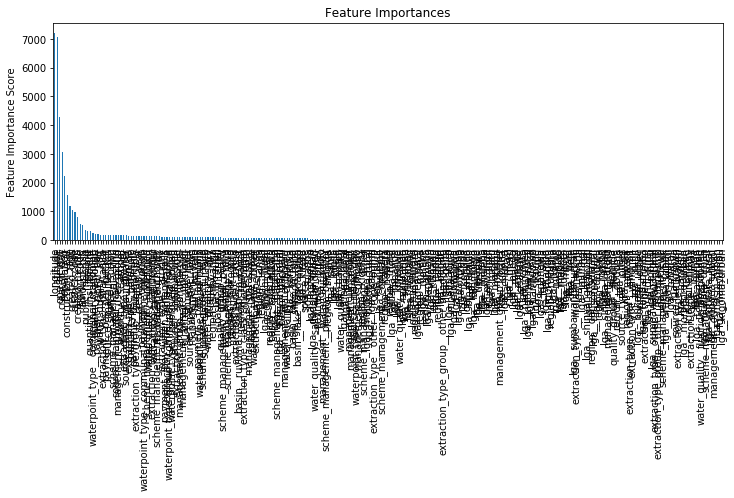

In [124]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(best_model._Booster.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [125]:
feat_imp.head(5)

longitude      7213
latitude       7056
gps_height     4283
created_day    3083
population     2215
dtype: int64

In [100]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.01, 0.03, 0.05], 'classifier__n_estimators': [10, 50, 250]}
clf = GridSearchCV(pipeline_gs, parameters)
clf.fit(X_train.values, y_train.values)
clf.grid_scores_

In [ ]:
# An iterating process, with a seperate function to decide necessary number of estimators 
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
import xgboost as xgb
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)
classifier.fit(X_train, y_train)

In [ ]:
from xgboost import XGBRegressor

params = {
'max_depth': 5,
'n_estimators': 50,
'objective': 'reg:linear'}
 
model = XGBRegressor(**params)
model.fit(X, y)

pred = model.predict(x_test)

from sklearn.model_selection import RandomizedSearchCV
 
search_params = {
'max_depth': list(range(2, 11, 1)),
'n_estimators': list(range(10, 60, 10))
}
 
search = RandomizedSearchCV(model, search_params, n_iter=20)
search.fit(X, y)

In [ ]:
from xgboost.sklearn import XGBClassifier  
xclas = XGBClassifier()  # and for classifier  
xclas.fit(X_train, y_train)  
xclas.predict(X_test)  
cross_val_score(xclas, X_train, y_train)  

import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1)  

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(X_train, y_train)  
gs.best_model_  

Done: Differencing between record year(date) and construction year

Done: "payment" and "payment_type" are the same -- no need to do

Done: After dummify, transpose, drop_duplicates on categorical range, and transpose back.

Trim space

Move month to draw a line right before the rain season

Done: Set missing numeric values to zero?

Done: Remove any col filled with homogeneous or nearly homogeneous data.GeoData Consultants Ltd was the sole group in recorded_by and hence removed.

get_dummies(df_clean, drop_first = True)?

Set weird values in numerical columns to NaN.

We set nthread to -1 to tell xgboost to use as many threads as available to build trees in parallel.
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)